In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import tqdm

from util import *

plt.style.use("ggplot")

In [3]:
df = pd.read_json("./data/preprocessed/preprocessed.json", orient="index")
with open("./data/preprocessed/param.json", "r") as f:
    params = json.load(f)
    print("params:", params)

user_n, item_n = params["user_n"], params["item_n"]

params: {'user_n': 1096, 'item_n': 3664}


In [4]:
df.head()

,valid_train_purchased_items,valid_eval_purchased_items,test_train_purchased_items,test_eval_purchased_items,valid_train_recommended_items,valid_eval_recommended_items,test_train_recommended_items,test_eval_recommended_items
0,"[3584, 2561, 3586, 3588, 3589, 3076, 522, 2061...","[2561, 516, 1157, 1159, 2061, 1038, 1171, 791,...","[3584, 2561, 3586, 3588, 3589, 3076, 516, 522,...","[2561, 3588, 3589, 2572, 2061, 2960, 277, 2972...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2049, 1, 2, 4, 5, 9, 11, 12, 2059, 13, 18, 20...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 4, 8, 10, 11, 16, 19, 32, 33, 34, 37, 42, ..."
1,"[0, 1, 3076, 3591, 2055, 1543, 2571, 2575, 206...","[1029, 1931, 2833, 2836, 2342, 1576, 303, 1969...","[0, 1, 3076, 1029, 3591, 2055, 1543, 2571, 257...","[130, 2055, 392, 137, 2824, 1931, 268, 1296, 2...","[0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 16, 19, 2...","[2048, 2049, 2, 5, 6, 2055, 9, 2059, 11, 13, 1...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16...","[2048, 1, 2049, 3, 5, 6, 7, 8, 2058, 2059, 19,..."
2,"[5, 2055, 2057, 2058, 2060, 2065, 2067, 2068, ...","[5, 2577, 1554, 531, 2068, 2075, 1564, 2082, 1...","[5, 2055, 2057, 2058, 2060, 2065, 2067, 2068, ...","[517, 2058, 1035, 2065, 2577, 1043, 2068, 531,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 5, 12, 13, 26, 27, 35, 42, 44, 47, 57, 58,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2, 3, 7, 10, 11, 19, 26, 29, 30, 33, 34, 41, ..."
3,"[1536, 3073, 4, 2570, 2571, 2060, 524, 1551, 3...","[2304, 2695, 906, 2060, 2957, 2446, 527, 1295,...","[1536, 3073, 4, 2570, 2571, 2060, 524, 1551, 5...","[906, 2446, 21, 802, 1061, 936, 937, 45, 2222,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16...","[2049, 1, 2, 5, 2054, 2055, 11, 12, 2064, 2067...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16...","[2049, 3, 6, 2055, 2054, 2060, 2068, 2071, 25,..."
4,"[2571, 2069, 1564, 1054, 34, 2101, 2623, 2626,...","[1923, 3076, 1159, 2187, 1296, 1044, 1818, 924...","[3076, 2571, 1044, 2069, 1564, 1054, 34, 2101,...","[9, 143, 2071, 1176, 2331, 2086, 3116, 2222, 8...","[0, 6, 13, 26, 27, 29, 30, 31, 33, 34, 35, 38,...","[2049, 1029, 5, 1033, 1036, 2067, 2068, 2069, ...","[0, 5, 6, 13, 26, 27, 29, 30, 31, 33, 34, 35, ...","[1, 2049, 3, 1026, 6, 2055, 3078, 11, 2059, 30..."


In [ ]:
uplift_based_nn_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="nn", lmda=1e-4),
)

accuracy_based_nn_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="nn",
        lmda=1e-4,
    ),
)

In [14]:
uplift_based_mf_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="mf", lmda=1e-8),
)

accuracy_based_mf_model, losses, results = train_nn(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="mf",
        lmda=1e-8,
    ),
)

Args(exp_name=None, mode='valid', model='mf', sampling='uplift-based-pointwise', seed=0, alpha=0.6, gamma_p=0.2, gamma_r=0.5, eta=0.01, lmda=1e-08, d=100, batch_size=1000, eval_step=1000, epochs=5000, device='cpu')


100%|██████████| 1096/1096 [00:01<00:00, 1042.62it/s]


{'Accuracy@10': 0.017573696145124718, 'Uplift@10': 0.02185329158118274, 'Accuracy@30': 0.010342417889587702, 'Uplift@30': 0.009329523461187424, 'Accuracy@100': 0.00669606512890095, 'Uplift@100': 0.005742563617488554}


100%|██████████| 1096/1096 [00:01<00:00, 1058.07it/s]


{'Accuracy@10': 0.04450800915331808, 'Uplift@10': 0.08089835094983831, 'Accuracy@30': 0.024139756484912653, 'Uplift@30': 0.031699100671614806, 'Accuracy@100': 0.013318538750426767, 'Uplift@100': 0.01695021479510301}


100%|██████████| 1096/1096 [00:01<00:00, 1068.53it/s]


{'Accuracy@10': 0.06494192185850053, 'Uplift@10': 0.10179723772648784, 'Accuracy@30': 0.032912245241704566, 'Uplift@30': 0.04458180940585397, 'Accuracy@100': 0.016821192052980133, 'Uplift@100': 0.02321171177296936}


100%|██████████| 1096/1096 [00:01<00:00, 928.60it/s]


{'Accuracy@10': 0.08336798336798337, 'Uplift@10': 0.09542042042042027, 'Accuracy@30': 0.042056701895655094, 'Uplift@30': 0.04636489560970857, 'Accuracy@100': 0.02014200792602378, 'Uplift@100': 0.023758533966223475}


100%|██████████| 1096/1096 [00:01<00:00, 1060.73it/s]


{'Accuracy@10': 0.10734406438631791, 'Uplift@10': 0.09457858260675153, 'Accuracy@30': 0.05183720547042346, 'Uplift@30': 0.04808805010299157, 'Accuracy@100': 0.023556499020248204, 'Uplift@100': 0.025985973562311766}
Args(exp_name=None, mode='valid', model='mf', sampling='accuracy-based-pointwise', seed=0, alpha=0.6, gamma_p=0.2, gamma_r=0.5, eta=0.01, lmda=1e-08, d=100, batch_size=1000, eval_step=1000, epochs=5000, device='cpu')


100%|██████████| 1096/1096 [00:01<00:00, 889.45it/s]


{'Accuracy@10': 0.049533678756476685, 'Uplift@10': 0.03465046467637141, 'Accuracy@30': 0.02875, 'Uplift@30': 0.016817996278090955, 'Accuracy@100': 0.016198618875369945, 'Uplift@100': 0.010104249854095809}


100%|██████████| 1096/1096 [00:01<00:00, 983.03it/s]


{'Accuracy@10': 0.07341389728096677, 'Uplift@10': 0.044278601000655324, 'Accuracy@30': 0.04118226600985222, 'Uplift@30': 0.020330550732563953, 'Accuracy@100': 0.02358515141647672, 'Uplift@100': 0.011596427979388051}


100%|██████████| 1096/1096 [00:01<00:00, 1034.31it/s]


{'Accuracy@10': 0.09807692307692308, 'Uplift@10': 0.026869256474519647, 'Accuracy@30': 0.05751440329218107, 'Uplift@30': 0.02102907103232581, 'Accuracy@100': 0.03250815394651011, 'Uplift@100': 0.013223100854302557}


100%|██████████| 1096/1096 [00:01<00:00, 1010.40it/s]


{'Accuracy@10': 0.11814516129032257, 'Uplift@10': 0.05467509920634924, 'Accuracy@30': 0.06778435239973701, 'Uplift@30': 0.02615848377226902, 'Accuracy@100': 0.03814923427826653, 'Uplift@100': 0.014612522585775058}


100%|██████████| 1096/1096 [00:01<00:00, 996.00it/s] 


{'Accuracy@10': 0.12441977800201816, 'Uplift@10': 0.05890955103871345, 'Accuracy@30': 0.07294852820259826, 'Uplift@30': 0.026303991165494426, 'Accuracy@100': 0.04070730117340287, 'Uplift@100': 0.01506724779020716}


100%|██████████| 1096/1096 [00:01<00:00, 759.54it/s]


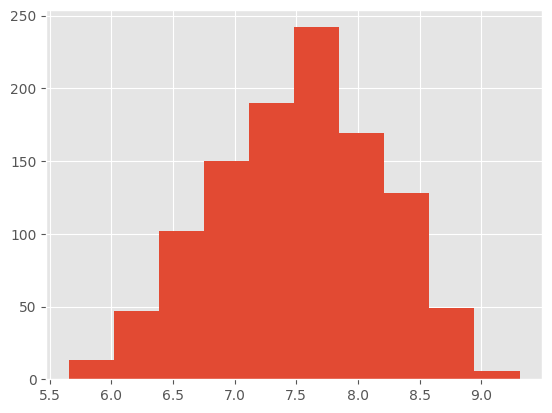

7.514071032278732


100%|██████████| 1096/1096 [00:01<00:00, 753.63it/s]


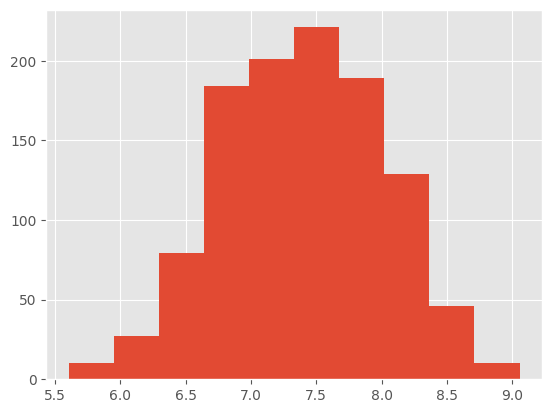

7.389277502185245


In [24]:
k = 10

for model in [uplift_based_mf_model, accuracy_based_mf_model]:
    model.eval()
    s = []
    for u in tqdm.tqdm(range(user_n)):
        y = model.forward(
            u=torch.LongTensor([u] * item_n),
            i=torch.arange(item_n),
        )
        rec_list = y.argsort().cpu().detach().numpy()[::-1][:k].tolist()
        embeddings = accuracy_based_mf_model.item_embedding.forward(
            torch.LongTensor(rec_list)
        ).cpu().detach().numpy()

        d = 0
        for i in range(k):
            for j in range(k):
                d += np.linalg.norm(embeddings[i] - embeddings[j])
        d /= k * k
        s.append(d)

    plt.hist(s)
    plt.show()
    print(sum(s) / len(s))